In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from scipy import stats

In [ ]:
df = pd.read_excel('../../pm-data/export-jsps001-1d.xlsx')

# ตั้ง 'timestamp' เป็น index 
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# ตั้งค่า freq ให้กับ index
df = df.asfreq('D')  # 'D' สำหรับรายวัน

In [7]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'timezone', 'humidity', 'pm_2_5',
       'pm_2_5_sp', 'temperature'],
      dtype='object')

In [6]:
df.drop(columns=(['timezone', 'pm_2_5_sp', 'Unnamed: 0']), inplace=True)

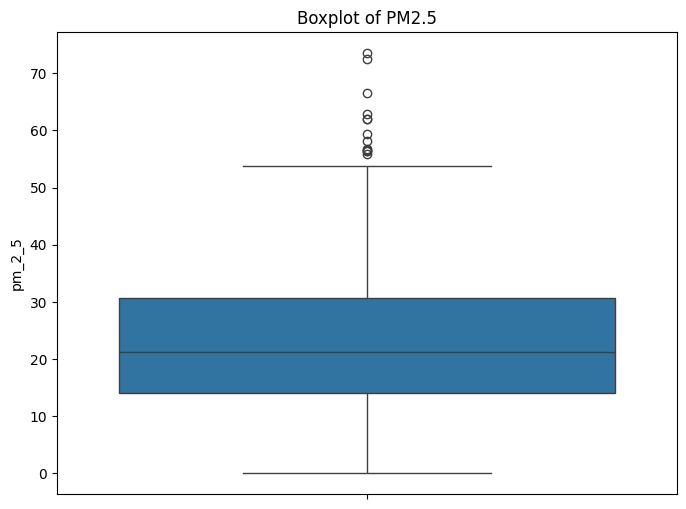

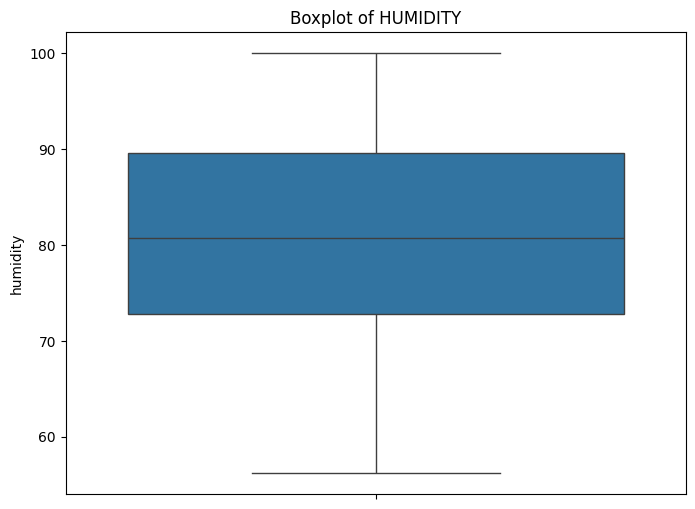

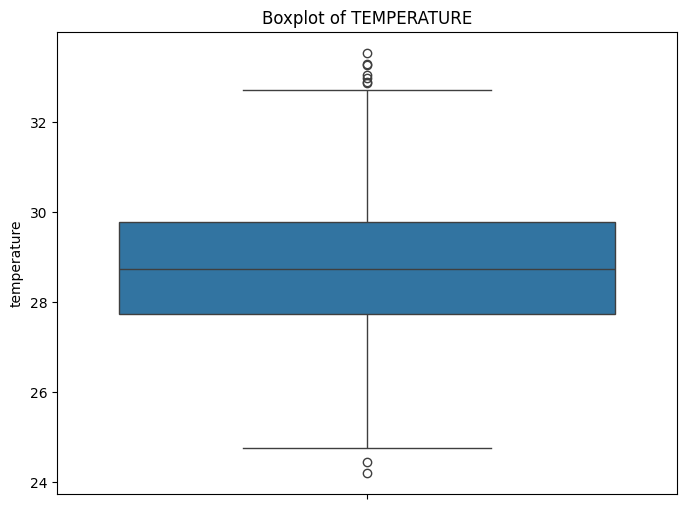

In [7]:
# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ pm2.5
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["pm_2_5"])
plt.title("Boxplot of PM2.5")
plt.show()

# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ pm10
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["humidity"])
plt.title("Boxplot of HUMIDITY")
plt.show()

# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ pm10
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["temperature"])
plt.title("Boxplot of TEMPERATURE")
plt.show()

In [8]:
# คำนวณ Q1, Q3 และ IQR สำหรับ pm_10
Q1 = df["pm_2_5"].quantile(0.25)
Q3 = df["pm_2_5"].quantile(0.75)
IQR = Q3 - Q1

# คำนวณ lower bound และ upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ตรวจสอบแถวที่เป็น outliers
outliers = df[(df["pm_2_5"] < lower_bound) | (df["pm_2_5"] > upper_bound)]

# หาค่าต่ำสุดที่เป็น outliers
min_outlier_pm = outliers["pm_2_5"].min()
max_outlier_pm = outliers["pm_2_5"].max()

#---------------

# คำนวณ Q1, Q3 และ IQR สำหรับ pm_10
Q1 = df["temperature"].quantile(0.25)
Q3 = df["temperature"].quantile(0.75)
IQR = Q3 - Q1

# คำนวณ lower bound และ upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ตรวจสอบแถวที่เป็น outliers
outliers = df[(df["temperature"] < lower_bound) | (df["temperature"] > upper_bound)]

# หาค่าต่ำสุดที่เป็น outliers
min_outlier_t = outliers["temperature"].min()
max_outlier_t = outliers["temperature"].max()

#----------------

# คำนวณ Q1, Q3 และ IQR สำหรับ pm_10
Q1 = df["humidity"].quantile(0.25)
Q3 = df["humidity"].quantile(0.75)
IQR = Q3 - Q1

# คำนวณ lower bound และ upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ตรวจสอบแถวที่เป็น outliers
outliers = df[(df["humidity"] < lower_bound) | (df["humidity"] > upper_bound)]

# หาค่าต่ำสุดที่เป็น outliers
min_outlier_h = outliers["humidity"].min()
max_outlier_h = outliers["humidity"].max()

#-----------------

print("-"*30,"PM 2.5","-"*30)
print(f"ค่าต่ำสุดที่เป็น outlier: {min_outlier_pm}")
print(f"ค่ามากสุดที่เป็น outlier: {max_outlier_pm}")

print("-"*30,"Temperature","-"*30)
print(f"ค่าต่ำสุดที่เป็น outlier: {min_outlier_t}")
print(f"ค่ามากสุดที่เป็น outlier: {max_outlier_t}")

print("-"*30,"Humidity","-"*30)
print(f"ค่าต่ำสุดที่เป็น outlier: {min_outlier_h}")
print(f"ค่ามากสุดที่เป็น outlier: {max_outlier_h}")

------------------------------ PM 2.5 ------------------------------
ค่าต่ำสุดที่เป็น outlier: 55.94265734265734
ค่ามากสุดที่เป็น outlier: 73.52762854950115
------------------------------ Temperature ------------------------------
ค่าต่ำสุดที่เป็น outlier: 24.20290155589149
ค่ามากสุดที่เป็น outlier: 33.52586884457097
------------------------------ Humidity ------------------------------
ค่าต่ำสุดที่เป็น outlier: nan
ค่ามากสุดที่เป็น outlier: nan


In [9]:
# def remove_outliers_tukey(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     print(f'Q1: {Q1}, Q3: {Q3}, IQR: {IQR}')
#     print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')
    
#     df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     print(f'Rows Before: {len(df)}, Rows After: {len(df_filtered)}')
    
#     return df_filtered

# df_clean_pm_2_5 = remove_outliers_tukey(df, 'pm_2_5')
# df_clean_temp = remove_outliers_tukey(df_clean_pm_2_5, 'temperature')
# df_clean_complete = remove_outliers_tukey(df_clean_temp, 'humidity')

In [10]:
def replace_outliers_interpolate(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # หาค่าที่เป็น Outliers และแทนเป็น NaN
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = None

    # Interpolation แทนค่า
    df[column] = df[column].interpolate(method='linear')

    return df

df_clean = df.copy()
df_clean = replace_outliers_interpolate(df_clean, 'pm_2_5')
df_clean = replace_outliers_interpolate(df_clean, 'temperature')
df_clean = replace_outliers_interpolate(df_clean, 'humidity')


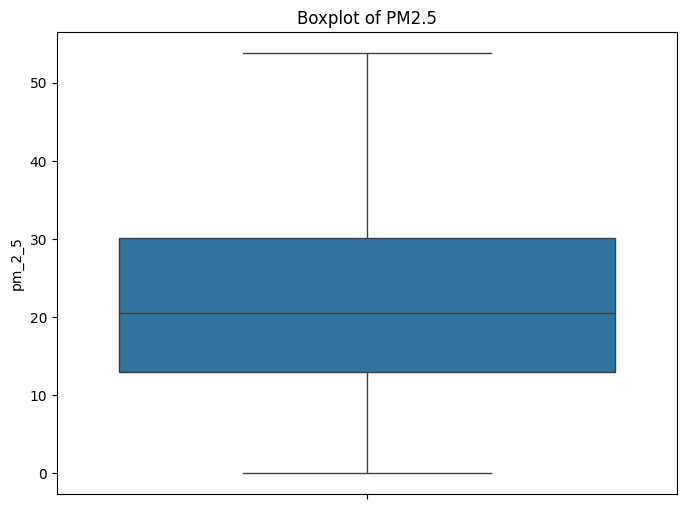

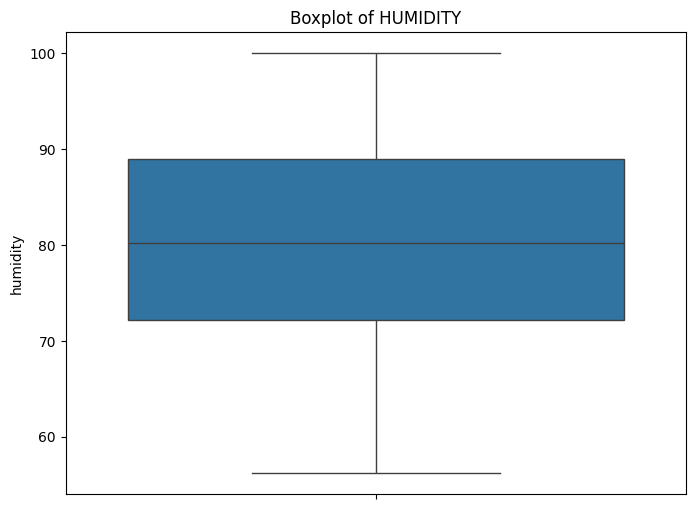

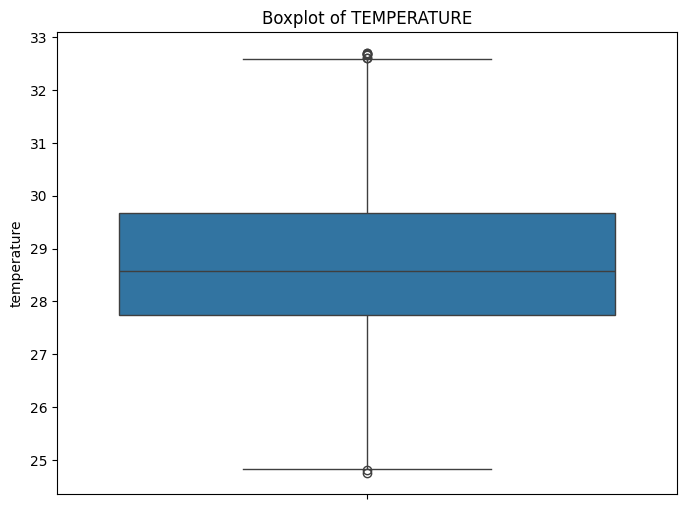

In [11]:
# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ pm2.5
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_clean["pm_2_5"])
plt.title("Boxplot of PM2.5")
plt.show()

# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ pm10
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_clean["humidity"])
plt.title("Boxplot of HUMIDITY")
plt.show()

# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ pm10
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_clean["temperature"])
plt.title("Boxplot of TEMPERATURE")
plt.show()

# df = df_clean_complete

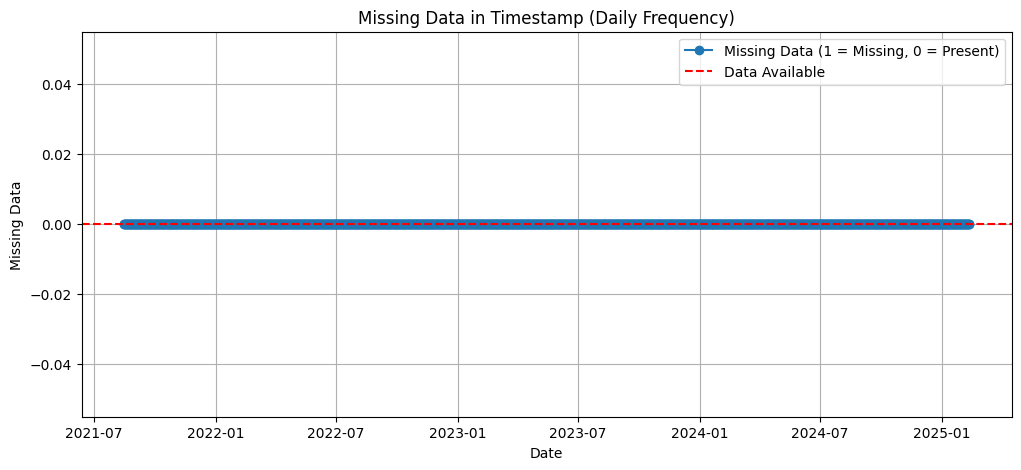

Missing Dates:
Empty DataFrame
Columns: [timestamp, humidity, pm_2_5, temperature]
Index: []


In [12]:
# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
numeric_cols = df_clean.select_dtypes(include=['number']).columns

# สร้างช่วงเวลาแบบรายวัน (ใช้เฉพาะคอลัมน์ตัวเลข)
df_resampled = df_clean[numeric_cols].set_index(df_clean.index).resample('D').mean().reset_index()

# คำนวณช่วงเวลาที่ขาดหาย (ต่างกันเกินปกติ)
missing_dates = df_resampled[df_resampled.isnull().any(axis=1)]

# พล็อตกราฟเพื่อดูว่ามีข้อมูลวันไหนที่ขาดหาย
plt.figure(figsize=(12, 5))
plt.plot(df_resampled['timestamp'], df_resampled.isnull().any(axis=1), marker='o', linestyle='-', label="Missing Data (1 = Missing, 0 = Present)")
plt.axhline(0, color='r', linestyle='--', label="Data Available")
plt.xlabel("Date")
plt.ylabel("Missing Data")
plt.title("Missing Data in Timestamp (Daily Frequency)")
plt.legend()
plt.grid()
plt.show()

# แสดงข้อมูลวันที่ขาดหาย
print("Missing Dates:")
print(missing_dates)


In [ ]:
# กำหนดชื่อไฟล์ที่ต้องการบันทึก
filename = '../export_data_jsp01/clean_data_jsps001_1d.csv'

# บันทึก DataFrame เป็นไฟล์ Excel
df_clean.to_csv(filename, index=True)  # ตั้ง index=True เพื่อให้ timestamp อยู่ในไฟล์

print(f"ไฟล์ Excel ถูกบันทึกที่ {filename}")

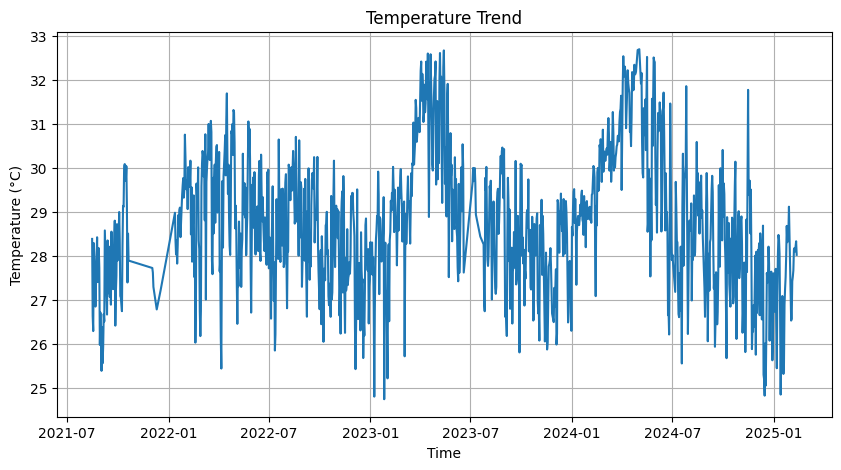

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot temperature
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_clean, x=df_clean.index, y="temperature")

plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trend")
plt.grid(True)
plt.show()
